## Html features. Visualization and experiments
Experimenting with the features extracted in the first notebook. 

### Motivation
Checking how the data is distributed, and also seeing whether we can predict some of the features from he others such as infering the type of the tag from the other features. Another experiment that could be run, might be trying to differentiating between different domains, and page types, using only the current features.

In [1]:
%matplotlib inline
# standard library
import itertools
import ast

from urllib.parse import urlparse

# pandas
import pandas as pd

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# skelearn
from sklearn.preprocessing import OneHotEncoder

# this styling is purely my preference
# less chartjunk
sns.set_context('notebook', font_scale=1.5, rc={'line.linewidth': 2.5})
sns.set(style='ticks', palette='Set2')

In [2]:
# load the data
df = pd.read_csv('../data/2017-07-24-14:00:13-ecommerce-ro-features.csv')
df = df.drop(['Unnamed: 0', 'classes', 'ancestor1_classes', 'ancestor2_classes', 'ancestor3_classes'], axis='columns')
df.head()

,depth,tag,no_classes,has_id,no_children,has_text,ancestor1_depth,ancestor1_tag,ancestor1_no_classes,ancestor1_has_id,...,ancestor2_has_id,ancestor2_no_children,ancestor2_has_text,ancestor3_depth,ancestor3_tag,ancestor3_no_classes,ancestor3_has_id,ancestor3_no_children,ancestor3_has_text,url
0,1,html,0,False,2,False,0,NaN,0,False,...,False,0,False,0,NaN,0,False,0,False,https://brx.ro/
1,2,head,0,False,30,False,1,html,0,False,...,False,0,False,0,NaN,0,False,0,False,https://brx.ro/
2,3,link,0,False,0,False,2,head,0,False,...,False,2,False,0,NaN,0,False,0,False,https://brx.ro/
3,3,meta,0,False,0,False,2,head,0,False,...,False,2,False,0,NaN,0,False,0,False,https://brx.ro/
4,3,title,0,False,0,True,2,head,0,False,...,False,2,False,0,NaN,0,False,0,False,https://brx.ro/


In [3]:
def get_domain_from_url(url):
    """Returns the fully-qualified domain fo an url."""
    parsed_uri = urlparse(url)
    return parsed_uri.netloc

df['domain'] = df.url.apply(get_domain_from_url)

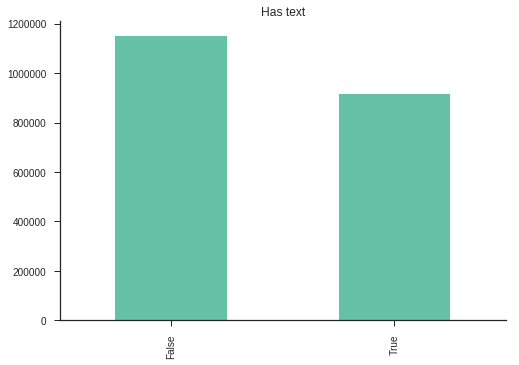

In [4]:
# how many elements have text
df.has_text.value_counts().plot.bar()
plt.title('Has text')
sns.despine()

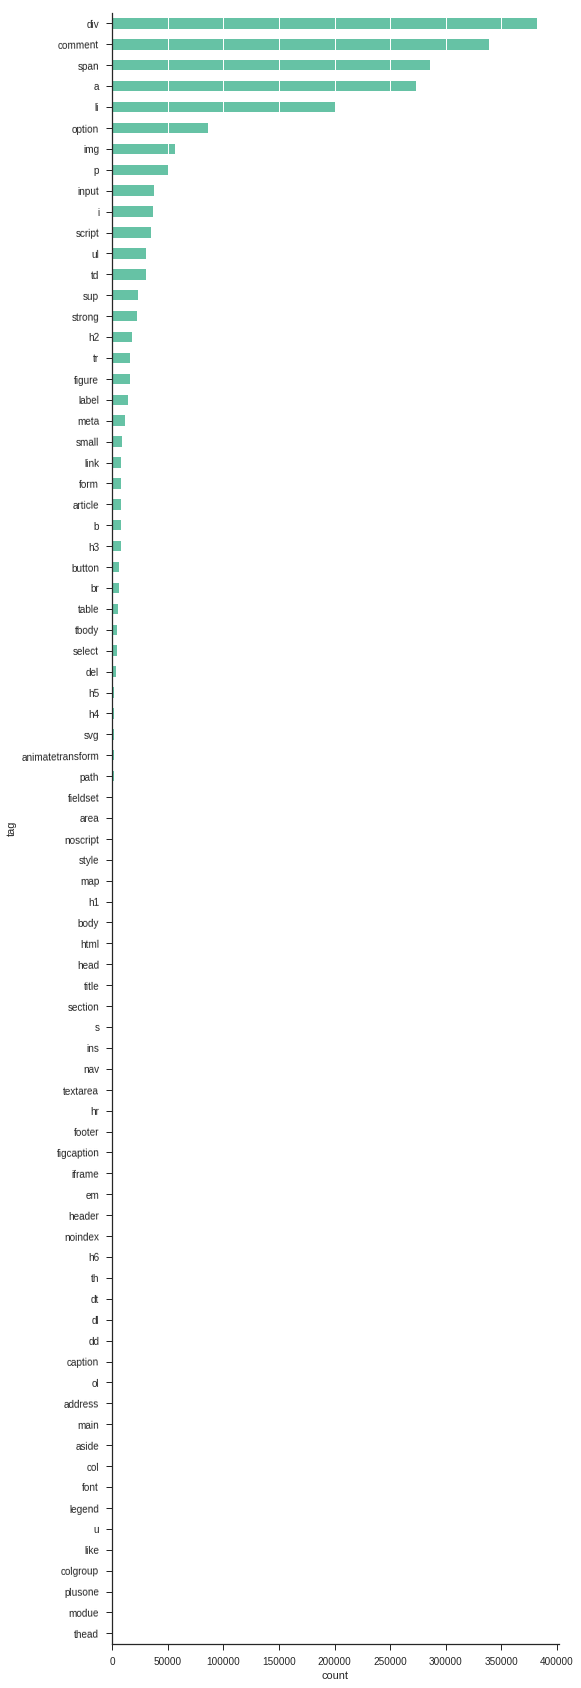

In [5]:
# how many for each tag
plt.figure(figsize=(8,30))
df.groupby(['tag']).count()

# order them by the count(Descending)
df.tag.value_counts(ascending=True).plot.barh(rot=1, zorder=-3)
plt.grid(axis='x', color='white', linestyle='-', linewidth=1)
plt.xlabel('count')
plt.ylabel('tag')
sns.despine()

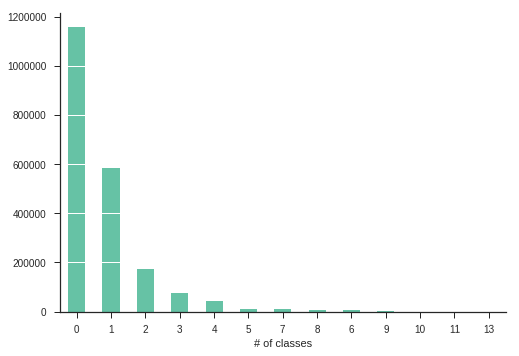

In [6]:
df.no_classes.value_counts().plot.bar(rot=1, zorder=-3)
plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.xlabel('# of classes')
sns.despine()

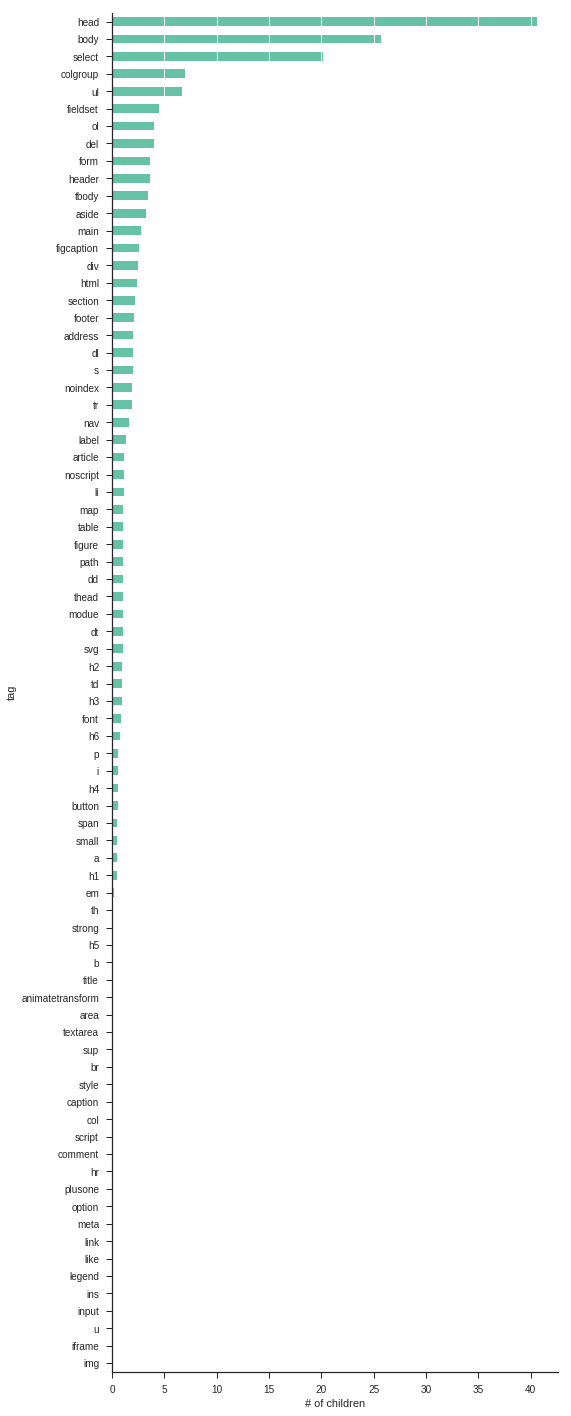

In [7]:
plt.figure(figsize=(8, 25))
df.groupby(['tag']).no_children.mean().sort_values().plot.barh(zorder=-3)
plt.grid(axis='x', color='white', linestyle='-', linewidth=1)
plt.xlabel('# of children')
sns.despine()

In [ ]:
# number of children distribution
df.no_children[df.no_children < 30].plot.bar(zorder=-3)
plt.xlabel('# of children')
plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
sns.despine()

Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x7fa6aa390950>
Traceback (most recent call last):
  File "/home/nikitautiu/anaconda2/envs/datascience3/lib/python3.6/weakref.py", line 109, in remove
    def remove(wr, selfref=ref(self), _atomic_removal=_remove_dead_weakref):
KeyboardInterrupt


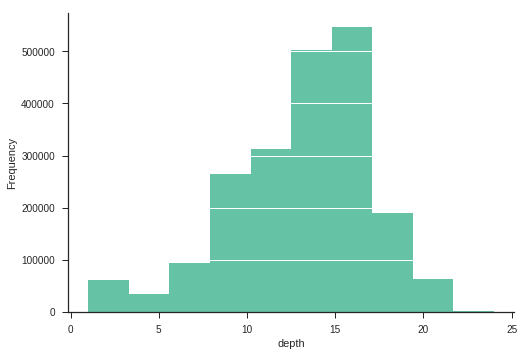

In [9]:
df.depth.plot.hist(zorder=-3)
plt.xlabel('depth')
plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
sns.despine()

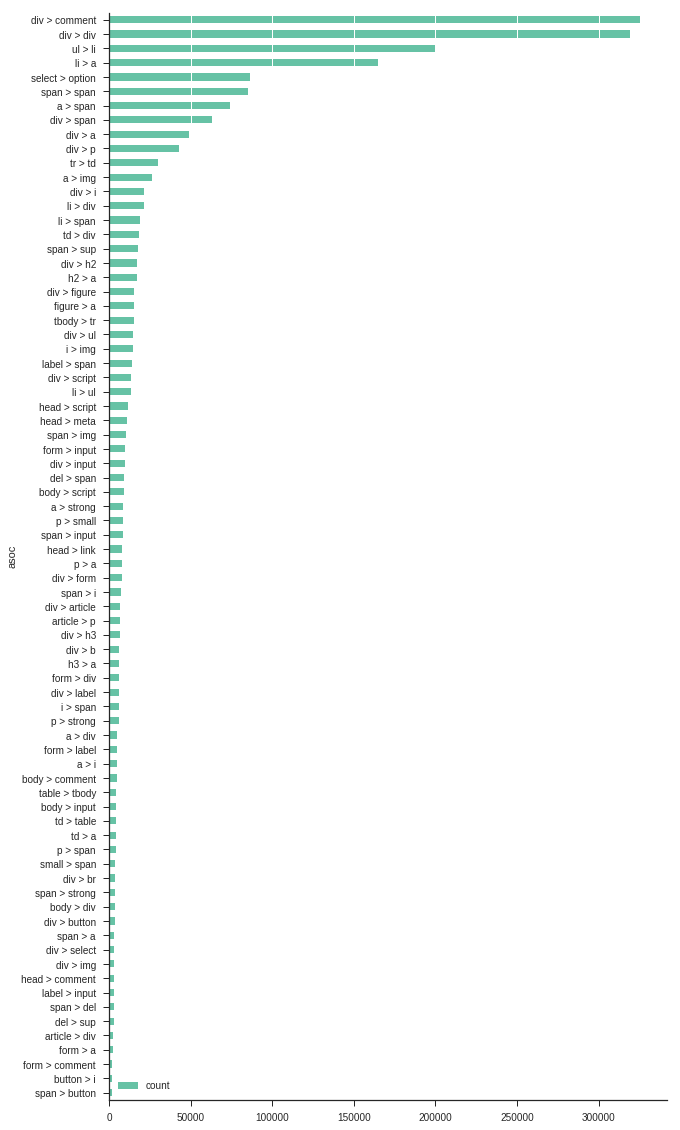

In [24]:
# count most frequent parent-child pairs of tags
pair_counts = df.groupby(['ancestor1_tag', 'tag']).size().sort_values(ascending=False)
pair_counts = pair_counts.reset_index()
pair_counts['asoc'] = pair_counts.ancestor1_tag + ' > '  + pair_counts.tag
pair_counts = pair_counts.rename(columns={0: 'count'})[['asoc', 'count']]
# pair_counts.index = pair_counts.asoc
pair_counts[75::-1].plot.barh(x='asoc', figsize=(10, 20), zorder=-3)
plt.grid(axis='x', color='white', linestyle='-', linewidth=1)
sns.despine()